# <div style="text-align: center; margin-top:2em; margin-bottom:1em">ESTADÍSTICA PARA INGENIERÍA Y CIENCIAS</div>
## <div style="text-align: center; margin-bottom:1em">PRÁCTICA 3: Regresión lineal múltiple</div>
## <div style="text-align: center; margin-bottom:1em">Ivan Svetlich</div>

***
<br></br>

In [3]:
#Librerias
library(IRdisplay)
library(ggplot2)
library(cowplot)
library(latex2exp)
library(data.table)
library(dplyr)
library(formattable)
library(tidyr)
library(afex)


### **Ejercicio 1**

#### <div style="text-align: justify">Se realiza un estudio para investigar la resistencia al esfuerzo cortante de un suelo $(y)$ y la relación que tiene ésta con la profundidad en pies $(x_1)$ y con el contenido de humedad $(x_2)$. Para ello se recopilan 10 observaciones, a partir de las cuales se obtiene lo siguiente:</div>

<table style="border: 1px solid #bcbcbc;">
    <thead>
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 1%;"><b>$n$</b></th>  
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} x_{i1}$</b></th>   
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} x_{i2}$</b></th>
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} y_{i}$</b></th>
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} y^2_{i}$</b></th>
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} x^2_{i1}$</b></th>   
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} x^2_{i2}$</b></th>   
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} x_{i1}x_{i2}$</b></th>
        <th style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} x_{i1}y_{i}$</b></th>
        <th style="text-align: center; vertical-align: middle; border-right: 0px solid #bcbcbc; width: 11%;"><b>$\sum_{i=1}^{n} x_{i2}y_{i}$</b></th>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">10</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">223</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">553</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">1916</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">371595.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">5200</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">31729</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">12352</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #bcbcbc;">43550</td>
            <td style="text-align: center; vertical-align: middle;">104736.8</td>
        </tr>       
    </tbody>
</table>
<div style="text-align: center"><i>Valores observados</i></div>

<br></br>

#### <div style="text-align: justify">a) Establezca las ecuaciones normales de mínimos cuadrados para el modelo</div>
#### <div style="text-align: justify">$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$</div>

<div style="text-align: justify">Las ecuaciones normales son:</div>

<div style="text-align: center">$$n \hat{\beta_0} + \hat{\beta_1} \sum_{i=1}^{n} x_{i1} + \hat{\beta_2} \sum_{i=1}^{n} x_{i2} = \sum_{i=1}^{n} y_{i}$$</div>

<div style="text-align: center">$$\hat{\beta_0} \sum_{i=1}^{n} x_{i1} + \hat{\beta_1} \sum_{i=1}^{n} x^2_{i1} + \hat{\beta_2} \sum_{i=1}^{n} x_{i1} x_{i2} = \sum_{i=1}^{n} x_{i1} y_{i}$$</div>

<div style="text-align: center">$$\hat{\beta_0} \sum_{i=1}^{n} x_{i2} + \hat{\beta_1} \sum_{i=1}^{n} x_{i1} x_{i2} + \hat{\beta_2} \sum_{i=1}^{n} x^2_{i2} = \sum_{i=1}^{n} x_{i2} y_{i}$$</div>

<br></br>

#### <div style="text-align: justify">b) Estime los parámetros del modelo del inciso $a)$</div>

In [10]:
n <- 10
sum_x1 <- 223; sum_x2 <- 553
sum_y <- 1916; sum_y_sq <- 371595.6 
sum_x1_sq <- 5200; sum_x2_sq <- 31729; sum_x1_x2 <- 12352 
sum_x1_y <- 43550; sum_x2_y <- 104736.8

A <- as.matrix(cbind(
    c(n, sum_x1, sum_x1_x2), 
    c(sum_x1, sum_x1_sq, sum_x1_x2), 
    c(sum_x2, sum_x1_x2, sum_x2_sq)))
B <- as.matrix(c(sum_y, sum_x1_y, sum_x2_y))

beta <- solve(A) %*% B


In [11]:
display_markdown(sprintf("$$\\begin{bmatrix} \\hat{\\beta_0} \\\\ \\hat{\\beta_1} \\\\ \\hat{\\beta_2}\\end{bmatrix} = \\begin{bmatrix} %f \\\\ %f \\\\ %f\\end{bmatrix}$$", beta[1], beta[2], beta[3]))


$$\begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \\ \hat{\beta_2}\end{bmatrix} = \begin{bmatrix} -0.311775 \\ 3.440475 \\ 2.082987\end{bmatrix}$$

<br></br>

#### <div style="text-align: justify">c) ¿Cuál es la resistencia al esfuerzo cortante predicha cuando $x_1 = 18$ pies y $x_2 = 43\%?$</div>

In [12]:
x <- as.matrix(c(1, 18, 43))
y <- sum(beta * x)


In [13]:
display_markdown(sprintf("$\\hat{y} = \\hat{\\beta_0} + \\hat{\\beta_1} x_1 + \\hat{\\beta_2} x_2 = %.4f$", y))


$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x_1 + \hat{\beta_2} x_2 = 151.1852$

***
<br></br>

### **Ejercicio 2**

#### <div style="text-align: justify">Se piensa que la potencia eléctrica consumida al mes por una planta química está relacionada con la temperatura ambiente promedio $\left(x_1\right)$, el número de días del mes $\left(x_2\right)$, la pureza promedio del producto $\left(x_3\right)$ y las toneladas de producto producidas $\left(x_4\right)$. Los datos correspondientes al año pasado son los siguientes:</div>

<table style="width: 50%">
<thead>
  <tr style="background-color: black; color: white; font-size: larger">
    <th>$y$</th>
    <th>$x_1$</th>
    <th>$x_2$</th>
    <th>$x_3$</th>
    <th>$x_4$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: center; vertical-align: middle;">240</td>
    <td style="text-align: center; vertical-align: middle;">25</td>
    <td style="text-align: center; vertical-align: middle;">24</td>
    <td style="text-align: center; vertical-align: middle;">91</td>
    <td style="text-align: center; vertical-align: middle;">100</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">236</td>
    <td style="text-align: center; vertical-align: middle;">31</td>
    <td style="text-align: center; vertical-align: middle;">21</td>
    <td style="text-align: center; vertical-align: middle;">90</td>
    <td style="text-align: center; vertical-align: middle;">95</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">290</td>
    <td style="text-align: center; vertical-align: middle;">45</td>
    <td style="text-align: center; vertical-align: middle;">24</td>
    <td style="text-align: center; vertical-align: middle;">88</td>
    <td style="text-align: center; vertical-align: middle;">110</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">274</td>
    <td style="text-align: center; vertical-align: middle;">60</td>
    <td style="text-align: center; vertical-align: middle;">25</td>
    <td style="text-align: center; vertical-align: middle;">87</td>
    <td style="text-align: center; vertical-align: middle;">88</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">301</td>
    <td style="text-align: center; vertical-align: middle;">65</td>
    <td style="text-align: center; vertical-align: middle;">25</td>
    <td style="text-align: center; vertical-align: middle;">91</td>
    <td style="text-align: center; vertical-align: middle;">94</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">316</td>
    <td style="text-align: center; vertical-align: middle;">72</td>
    <td style="text-align: center; vertical-align: middle;">26</td>
    <td style="text-align: center; vertical-align: middle;">94</td>
    <td style="text-align: center; vertical-align: middle;">99</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">300</td>
    <td style="text-align: center; vertical-align: middle;">80</td>
    <td style="text-align: center; vertical-align: middle;">25</td>
    <td style="text-align: center; vertical-align: middle;">87</td>
    <td style="text-align: center; vertical-align: middle;">97</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">296</td>
    <td style="text-align: center; vertical-align: middle;">84</td>
    <td style="text-align: center; vertical-align: middle;">25</td>
    <td style="text-align: center; vertical-align: middle;">86</td>
    <td style="text-align: center; vertical-align: middle;">96</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">267</td>
    <td style="text-align: center; vertical-align: middle;">75</td>
    <td style="text-align: center; vertical-align: middle;">24</td>
    <td style="text-align: center; vertical-align: middle;">88</td>
    <td style="text-align: center; vertical-align: middle;">110</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">276</td>
    <td style="text-align: center; vertical-align: middle;">60</td>
    <td style="text-align: center; vertical-align: middle;">25</td>
    <td style="text-align: center; vertical-align: middle;">91</td>
    <td style="text-align: center; vertical-align: middle;">105</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">288</td>
    <td style="text-align: center; vertical-align: middle;">50</td>
    <td style="text-align: center; vertical-align: middle;">25</td>
    <td style="text-align: center; vertical-align: middle;">90</td>
    <td style="text-align: center; vertical-align: middle;">100</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">261</td>
    <td style="text-align: center; vertical-align: middle;">38</td>
    <td style="text-align: center; vertical-align: middle;">23</td>
    <td style="text-align: center; vertical-align: middle;">89</td>
    <td style="text-align: center; vertical-align: middle;">98</td>
  </tr>
</tbody>
</table>

In [5]:
df <- data.frame(read.table("./TP3_tables/data2.txt", header = TRUE))
names(df) <- c("y", "x1", "x2", "x3", "x4")


In [6]:
display_markdown("#### **Resumen de los datos**")
df_summary <- as.data.frame(apply(df, 2, summary))
df_summary$values <- rownames(df_summary)
df_summary <- df_summary[,c(6,1,2,3,4,5)]
colnames(df_summary)[1] <- " "
rownames(df_summary) <- c()
table <- formattable(df_summary, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL)


#### **Resumen de los datos**

HTML widgets cannot be represented in plain text (need html)

<br></br>

#### <div style="text-align: justify">a) Ajuste un modelo de regresión lineal múltiple a los datos contenidos en la tabla anterior.</div>

<div style="text-align: justify">El modelo propuesto incluye las 4 variables independientes $x_i$:</div>

<div style="text-align: center">$$y = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4$$</div>

In [7]:
model <- lm(y ~ x1 + x2 + x3 + x4, data=df)


In [8]:
coef <- as.data.frame(x=model$coefficients)
colnames(coef) <- c('')
rownames(coef) <- c('β0', 'β1', 'β2', 'β3', 'β4')
coef <- as.data.frame(t(coef))
table <- formattable(coef, align = c("c", "c", "c", "c", "c"))
display_markdown("#### **Coeficientes**")
as.htmlwidget(table, width="50%", height=NULL)


#### **Coeficientes**

HTML widgets cannot be represented in plain text (need html)

<br></br>

#### <div style="text-align: justify">b) Prediga el consumo de potencia para un mes en el que $x_1 = 75ºF$, $x_2 = 24 \text{ días}$, $x_3 = 30\%$ y $x_4 = 98 \text{ toneladas}$.</div>

In [9]:
x_test <- data.frame(x1=75, x2=24, x3=30, x4=98)
y_test <- predict(model, x_test, interval = "none", type = "response")


In [10]:
display_markdown(paste("$\\hat{y} = \\hat{\\beta}_1 x_1 + \\hat{\\beta}_2 x_2 + \\hat{\\beta}_3 x_3 + \\hat{\\beta}_4 x_4 = $", round(y_test, 4)))


$\hat{y} = \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3 + \hat{\beta}_4 x_4 = $ 201.3144

<br></br>

#### <div style="text-align: justify">c) Pruebe la significancia de la regresión utilizando $\alpha = 0.01$. ¿Cuál es el p-valor de la prueba?</div>

<div style="text-align: justify">Para determinar la significancia de la regresión se prueba la hipótesis nula:</div>

<div style="text-align: center">$$H_{0_1}: \beta_1 = \beta_2 = 0$$</div>

<div style="text-align: justify">Esta hipótesis establece que ninguna de las variables independientes tiene alguna relación lineal con la variable dependiente. El estadístico de prueba es:</div>

<div style="text-align: center">$$F_0 = \frac{MSR}{MSE}$$</div>

<div style="text-align: justify">Si la hipótesis nula es rechazada, al menos una de las variables regresoras esta linealmente relacionada con la variable respuesta.</div>

In [69]:
f_stat<- as.data.frame(t(summary(model)$fstatistic))
f_stat$p_value <- c(pf(f_stat[,1], f_stat[,2], f_stat[,3], lower.tail=FALSE))
f_stat <- as.data.frame(cbind('F-statistic', f_stat))
colnames(f_stat) <- c(' ', 'value', 'df1', 'df2', 'p-value')
table <- formattable(f_stat, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL, )


HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor de la regresión es $0.0303 > 0.01$, así que no es posible rechazar la hipótesis nula de que al menos uno de los parámetros $\beta_j$ del modelo es 0.</div>

<br></br>

#### <div style="text-align: justify">d) Estime $\sigma^2$.</div>

<div style="text-align: justify">La estimación de la varianza del error para un modelo de regresión múltiple con $p$ parámetros y $n$ observaciones es:</div>

<div style="text-align: center">$$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2}{n - p} = \frac{SSE}{n - p} = MSE$$</div>

In [30]:
y_pred <- predict(model) # valores predichos
y_true <- df['y'] # valores verdaderos
SSE <- sum((y_true - y_pred)^2)
n <- nrow(df) # n=12 observaciones
p <- ncol(coef) # p=5 coeficientes de regresión
MSE <- SSE / (n - p)


In [31]:
display_markdown(paste("$\\hat{\\sigma^2} = \\text{MSE} =$", round(MSE, 4)))


$\hat{\sigma^2} = \text{MSE} =$ 242.7156

In [53]:
# Otra forma
residuals <- anova(model)['Residuals',]
residuals$values <- rownames(residuals)
residuals <- residuals[,c(6,1,2,3)]
colnames(residuals)[1] <- " "
rownames(residuals) <- c()
table <- formattable(residuals, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL, )


HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">La columna <b>Mean Sq</b> es el MSE, y su valor coincide con el calculado previamente.</div>

<br></br>

#### <div style="text-align: justify">e) Utilice la prueba t para evaluar la contribución al modelo de cada variable de regresión. Si se emplea $\alpha = 0.01$, ¿qué conclusiones pueden obtenerse?</div>

<div style="text-align: justify">El estadístico $t$ de Student se utiliza para probar la hipótesis nula de que el valor verdadero del coeficiente $\beta_j$ es igual a 0. Este estadístico es igual al cociente del estimador del coeficiente y su desviación estándar:</div>

<div style="text-align: center">$$T_0 = \frac{\hat{\beta}_j}{\text{se}\left(\hat{\beta}_j\right)}$$</div>

In [112]:
model_coef <- format(round(model_summary$coefficients, 5), nsmall=5)
model_coef <- cbind(coef=c('β0', 'β1', 'β2', 'β3', 'β4'), model_coef)
colnames(model_coef)[1] <- "Coefficient"
rownames(model_coef) <- c()
table <- formattable(as.data.frame(model_coef, 5), align='c', list('Coefficient' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL)


HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor del test $H_0: \beta_j = 0$ es mayor que $\alpha = 0.01$ para todos los coeficientes del modelo. Este resultado indica que la contribución de cada variable regresora, dado que el resto de los regresores también se incluyen en el modelo, es poco significativa.</div>

<br></br>

#### <div style="text-align: justify">f) Encuentre un intervalo de confianza del 95% para los coeficientes de regresión $\beta_1$, $\beta_2$, $\beta_3$ y $\beta_4$.</div>

<div style="text-align: justify">Dado un modelo con $p$ parámetros y $n$ observaciones, el intervalo de confianza de $100(1 - \alpha)%$ para un coeficiente de regresión $\beta_j$ individual está dado por:</div>

#### <div style="text-align: center">$$\hat{\beta}_j \pm t_{\alpha/2, n-p}se(\hat{\beta}_j)$$</div>

<div style="text-align: justify">donde $\hat{\beta}_j$ es la estimación del coeficiente de regresión, $t_{\alpha/2, n-p}$ es el valor de la distribución t de Student con $\left(\alpha/2, n-p\right)$ grados de libertad y $se(\hat{\beta}_j)$ es la desviación standard de la estimación del coeficiente.</div>

In [62]:
alpha <- 0.05
beta <- as.data.frame(model_summary$coefficients)['Estimate']
std_dev <- as.data.frame(model_summary$coefficients)['Std. Error']
t <- qt(alpha/2, 8, lower.tail=FALSE) # 7 grados de libertad
conf_int <- as.data.frame(c(round(beta - t * std_dev, 4), round(beta + t * std_dev, 4)), col.names=c('lwr', 'upr'), row.names=c('$\\beta_0$', '$\\beta_1$', '$\\beta_2$', '$\\beta_3$', '$\\beta_4$'))
conf_int <- conf_int[-1,]
display_markdown("Intervalos de confianza del 95% para los coeficientes de regresión:")
for (row in 1:nrow(conf_int))
{
    display_markdown(glue::glue("{rownames(conf_int)[row]}: ({conf_int$lwr[row]}, {conf_int$upr[row]})"))
}


Intervalos de confianza del 95% para los coeficientes de regresión:

$\beta_1$: (-0.2453, 1.456)

$\beta_2$: (-3.2994, 21.1467)

$\beta_3$: (-4.0776, 6.9525)

$\beta_4$: (-1.6786, 1.7058)

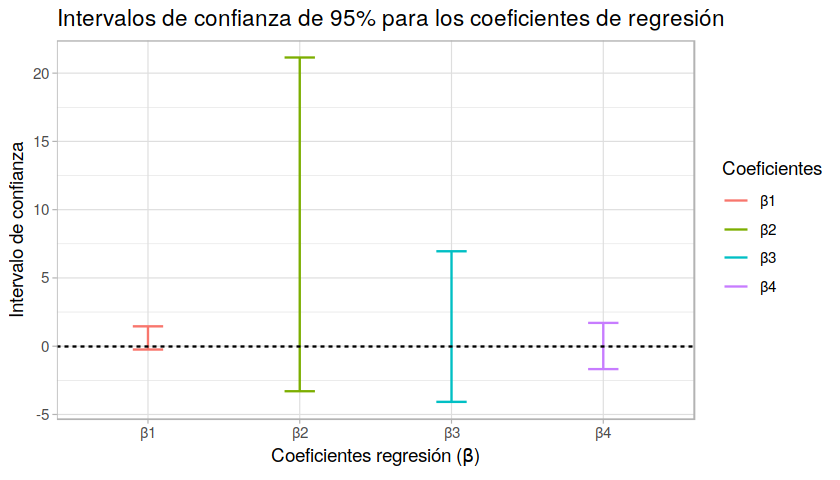

In [63]:
names <- c('β1', 'β2', 'β3', 'β4')
conf_int$avg <- apply(conf_int, 1, mean)

# Gráfico de los intervalos de confianza
options(repr.plot.width=7, repr.plot.height=4)
ggplot(conf_int, aes(names, avg, colour=names)) + 
    ggtitle("Intervalos de confianza de 95% para los coeficientes de regresión") +
    geom_errorbar(aes(ymin=lwr, ymax=upr), width = 0.2) +
    labs(x=TeX('Coeficientes regresión ($\\beta$ )'), y='Intervalo de confianza', color='Coeficientes') +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light()


<div style="text-align: justify">Todos los intervalos incluyen al cero, y por lo tanto no es posible rechazar la hipótesis $H_0: \beta_j = 0$.</div>

<br></br>

#### <div style="text-align: justify">g) Encuentre un intervalo de confianza del 95% para la media de Y cuando $x_1 = 75$, $x_2 = 24$, $x_3 = 90$ y $x_4 = 98$.</div>

<div style="text-align: justify">El intervalo de confianza de $100(1 - \alpha)%$ para la respuesta media en el punto $\left(x_1 = x_{01}, x_2 = x_{02}, x_3 = x_{03}, x_4 = x_{04}\right)$ está dado por:</div>

#### <div style="text-align: center">$$\hat{\mu} \pm t_{\alpha/2, n-p}se(\hat{\mu})$$</div>

<div style="text-align: justify">donde:</div>

#### <div style="text-align: center">$$\hat{\mu} = \hat{\beta}_0 + \hat{\beta}_1 x_{01} + \hat{\beta}_2 x_{02} + \hat{\beta}_3 x_{03} + \hat{\beta}_4 x_{04}$$</div>

In [87]:
x_test <- data.frame(x1=75, x2=24, x3=90, x4=98)
y_conf <- as.data.frame(predict(model, x_test, interval="confidence", level=0.95, type="response"))
colnames(y_conf) <- c('ajuste', 'cota inferiror', 'cota superior')
y_conf <- select(y_conf, 2, 1, 3)
display_markdown('#### **Intervalo de confianza:**')
as.htmlwidget(formattable(as.data.frame(y_conf), align="c"), width="50%")
display_markdown(sprintf("Intervalo de confianza del 95%% para la media de la potencia mensual consumida: $\\left(%.4f, %.4f\\right)$", y_conf[1], y_conf[3]))


#### **Intervalo de confianza:**

HTML widgets cannot be represented in plain text (need html)

Intervalo de confianza del 95% para la media de la potencia mensual consumida: $\left(263.7879, 311.3357\right)$

<br></br>

#### <div style="text-align: justify">h) Encuentre un intervalo de predicción del 95% para la media de Y cuando $x_1 = 75$, $x_2 = 24$, $x_3 = 90$ y $x_4 = 98$.</div>

<div style="text-align: justify">El intervalo de predicción de $100(1 - \alpha)%$ para una observación futura en el punto $\left(x_1 = x_{01}, x_2 = x_{02}, x_3 = x_{03}, x_4 = x_{04}\right)$ está dado por:</div>

#### <div style="text-align: center">$$\hat{y}_0 \pm t_{\alpha/2, n-p} \sqrt{\hat{\sigma}^2 + \left[se\left(\hat{\mu}\right)\right]^2}$$</div>

<div style="text-align: justify">donde:</div>

#### <div style="text-align: center">$$\hat{y}_0 = \hat{\mu} = \hat{\beta}_1 x_{01} + \hat{\beta}_2 x_{02} + \hat{\beta}_3 x_{03} + \hat{\beta}_4 x_{04}$$</div>

In [86]:
y_pred <- as.data.frame(predict(model, x_test, interval="prediction", level=0.95, type="response"))
colnames(y_pred) <- c('ajuste', 'cota inferiror', 'cota superior')
y_pred <- select(y_pred, 2, 1, 3)
display_markdown('#### **Intervalo de predicción:**')
as.htmlwidget(formattable(as.data.frame(y_pred), align="c"), width="50%")
display_markdown(sprintf("Intervalo de predicción del 95%% para la media de la potencia mensual consumida: $\\left(%.4f, %.4f\\right)$", y_pred[1], y_pred[3]))

#### **Intervalo de predicción:**

HTML widgets cannot be represented in plain text (need html)

Intervalo de predicción del 95% para la media de la potencia mensual consumida: $\left(243.7175, 331.4062\right)$

<br></br>

#### <div style="text-align: justify">i ) Para este modelo calcule $R^2$. Interprete esta cantidad.</div>

In [89]:
r_squared <- summary(model)$r.squared
display_markdown(sprintf('$R^2 = %f$', r_squared))

$R^2 = 0.744750$

<div style="text-align: justify">El coeficiente de determinación $R^2$ indica qué proporción de la dispersión observada en la variable dependiente $\left(y\right)$ es predecible a partir de las variables independientes $\left(x_j\right)$. Un valor $R^2 = 0.744750$ es un resultado aceptable.</div>

<br></br>

#### <div style="text-align: justify">Respondo en conjunto:</div>
#### <ul><li style="text-align: justify">j ) Haga una gráfica de residuos contra $\hat{y}$. Interprete esta gráfica.</li><br /><li style="text-align: justify">k) Construya una gráfica de probabilidad normal de los residuos y haga un comentario sobre la suposición de normalidad.</li></ul>

In [90]:
# LOWESS line (la misma linea que ajusta los valores usando plot(model)): 
smoothed <- data.frame(with(df, lowess(x = model$fitted, y = model$residuals)))

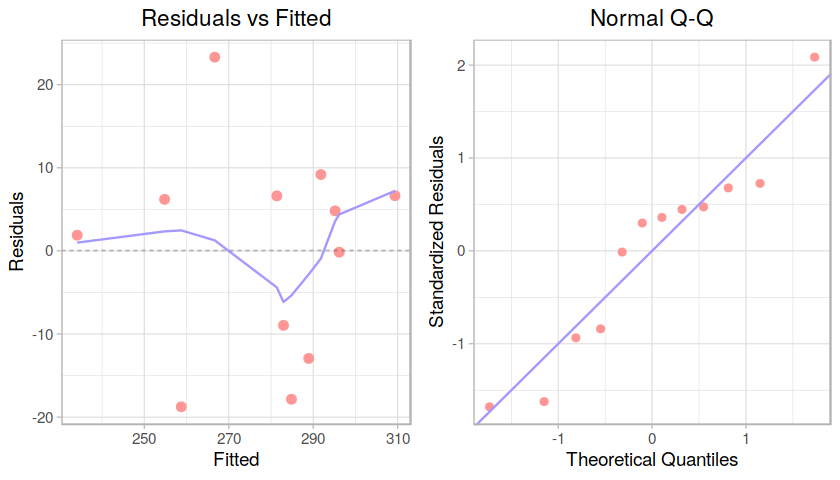

In [91]:
# Gráficos
options(repr.plot.width=7, repr.plot.height=4)
res_vs_fit <- ggplot(model) + 
    geom_point(aes(x=model$fitted, y=model$residuals),color= '#ff9696', size=2) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff") +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(plot.title = element_text(hjust = 0.5))

qq_plot <- ggplot(model, aes(qqnorm(.stdresid)[[1]], .stdresid)) +
    geom_point(na.rm = TRUE,color= '#ff9696') +
    geom_abline(col="#a399ff") +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(plot.title = element_text(hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">La gráfica de residuos vs valores ajustados sugiere que la varianza de los errores podría no ser constante, dado que se observa mayor dispersión en los valores intermedios que en los extremos. Sin embargo, esto no implica una violación grave del principio de varianza constante.</div>
<div style="text-align: justify">En cuanto a la gráfica de probabilidad normal, los valores no se ajustan a una recta, lo cual pone en duda la normalidad de los residuos.</div>
<div style="text-align: justify">Se debe tener en cuenta que la cantidad de muestras es chica y esto dificulta un análisis visual concluyente.</div>

***
<br></br>

### **Ejercicio 3**

#### <div style="text-align: justify">Se efectúa un estudio sobre el desgaste de un cojinete $\left(y\right)$ y su relación con $x_1 = \text{viscosidad del aceite}$, y $x_2 = \text{carga}$. Se obtienen los siguientes datos:</div>

<table style="width: 50%">
<thead>
  <tr style="background-color: black; color: white; font-size: larger">
    <th>$y$</th>
    <th>$x_1$</th>
    <th>$x_2$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: center; vertical-align: middle;">193</td>
    <td style="text-align: center; vertical-align: middle;">1.6</td>
    <td style="text-align: center; vertical-align: middle;">851</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">230</td>
    <td style="text-align: center; vertical-align: middle;">15.5</td>
    <td style="text-align: center; vertical-align: middle;">816</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">172</td>
    <td style="text-align: center; vertical-align: middle;">22.0</td>
    <td style="text-align: center; vertical-align: middle;">1058</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">91</td>
    <td style="text-align: center; vertical-align: middle;">43.0</td>
    <td style="text-align: center; vertical-align: middle;">1201</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">113</td>
    <td style="text-align: center; vertical-align: middle;">33.0</td>
    <td style="text-align: center; vertical-align: middle;">1357</td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;">125</td>
    <td style="text-align: center; vertical-align: middle;">40.0</td>
    <td style="text-align: center; vertical-align: middle;">1115</td>
  </tr>
</tbody>
</table>

In [5]:
df <- data.frame(read.table("./TP3_tables/data3.txt", header = TRUE))
names(df) <- c("y", "x1", "x2")


In [6]:
display_markdown("#### **Resumen de los datos**")
df_summary <- as.data.frame(apply(df, 2, summary))
df_summary$values <- rownames(df_summary)
df_summary <- df_summary[,c(4,1,2,3)]
colnames(df_summary)[1] <- " "
rownames(df_summary) <- c()
table <- formattable(df_summary, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL)


#### **Resumen de los datos**

HTML widgets cannot be represented in plain text (need html)

<br></br>

#### <div style="text-align: justify">a) Ajuste un modelo de regresión lineal múltiple a los datos contenidos en la tabla anterior.</div>

In [7]:
model_1 <- lm(y ~ x1 + x2, data=df)


In [103]:
display_markdown('#### **Primer modelo** $\\left(y = \\beta_0 + \\beta_1 x_1 + \\beta_2 x_2 \\right)$')
coef <- as.data.frame(x=model_1$coefficients)
colnames(coef) <- c('')
rownames(coef) <- c('β0', 'β1', 'β2')
coef <- as.data.frame(t(coef))
table <- formattable(coef, align = 'c')
as.htmlwidget(table, width="50%", height=NULL)


#### **Primer modelo** $\left(y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 \right)$

HTML widgets cannot be represented in plain text (need html)

<br></br>

#### <div style="text-align: justify">b) Utilice el modelo para predecir el desgaste cuando $x_1 = 25$ y $x_2 = 1000$.</div>

In [104]:
x_test <- data.frame(x1=25, x2=1000)
y_test_1 <- predict(model_1, x_test, interval = "none", type = "response")
display_markdown(paste("$\\hat{y} = \\hat{\\beta}_0 + \\hat{\\beta}_1 \\times 25 + \\hat{\\beta}_2 \\times 1000 = $", round(y_test_1, 4)))


$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \times 25 + \hat{\beta}_2 \times 1000 = $ 165.2902

<br></br>

#### <div style="text-align: justify">c) Ajuste un modelo de regresión lineal múltiple con un término de interacción entre los datos</div>

In [105]:
model_2 <- lm(y ~ x1 * x2, data=df)


In [106]:
display_markdown('#### **Segundo modelo** $\\left(y = \\beta_0 + \\beta_1 x_1 + \\beta_2 x_2 + \\beta_{1:2} x_1 x_2\\right)$')
coef <- as.data.frame(x=model_2$coefficients)
colnames(coef) <- c('')
rownames(coef) <- c('β0', 'β1', 'β2', 'β12')
coef <- as.data.frame(t(coef))
table <- formattable(coef, align = 'c')
as.htmlwidget(table, width="50%", height=NULL)


#### **Segundo modelo** $\left(y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{1:2} x_1 x_2\right)$

HTML widgets cannot be represented in plain text (need html)

<br></br>

#### <div style="text-align: justify">d) Utilice el modelo del inciso ***c)*** para hacer una predicción cuando $x_! = 25$ y $x_2 = 1000$. Compare esta predicción con el valor calculado en el inciso ***b)***.</div>

In [107]:
y_test_2 <- predict(model_2, x_test, interval = "none", type = "response")
display_markdown(paste("$\\hat{y} = \\hat{\\beta}_0 + \\hat{\\beta}_1 \\times 25 + \\hat{\\beta}_2 \\times 1000 + \\hat{\\beta}_{1:2} \\times 25 \\times 1000 = $", round(y_test_2, 4)))


$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \times 25 + \hat{\beta}_2 \times 1000 + \hat{\beta}_{1:2} \times 25 \times 1000 = $ 184.4907

<div style="text-align: justify">El primer modelo predijo un valor de $165.2902$, mientras que el segundo modelo predijo $184.4907$. Algunas observaciones:
    <ul>
        <li>En ambos casos el test de significancia de la regresión arrojó p-valores mayores a $0.05$ $\left(\text{p-valor}_1 =0.05138 \text{ y p-valor}_2 = 0.1169\right)$. Por lo tanto se aceptan las hipótesis nulas de que la variable dependiente $\left(y\right)$ no depende de las variables regresoras $\left(x_1 \text{ y } x_2\right)$.</li>
        <li>En el primer modelo las estimaciones de los coeficientes $\beta_1$ y $\beta_2$ arrojaron valores negativos, lo cual indica una relación inversa entre la variable dependiente y las regresoras. En el segundo modelo estas estimaciones resultaron positivas, mientras que la estimación del coeficiente del término de interacción fue negativa.</li>
    </ul>
</div>

<br></br>

#### <div style="text-align: justify">e) Pruebe la significancia de la regresión utilizando $\alpha = 0.05$. ¿Cuál es el p-valor de la prueba? ¿Qué conclusiones se obtienen?</div>

<div style="text-align: justify">Para determinar la significancia de la regresión se prueba la hipótesis nula:</div>

#### <div style="text-align: center">$$H_{0_1}: \beta_1 = \beta_2 = 0$$</div>

<div style="text-align: justify">Para ello se utiliza el estadístico $F$.</div>

In [108]:
display_markdown('#### **Primer modelo** $\\left(y = \\beta_0 + \\beta_1 x_1 + \\beta_2 x_2 \\right)$')
f_stat<- as.data.frame(t(summary(model_1)$fstatistic))
f_stat$p_value <- c(pf(f_stat[,1], f_stat[,2], f_stat[,3], lower.tail=FALSE))
f_stat <- as.data.frame(cbind('F-statistic', f_stat))
colnames(f_stat) <- c(' ', 'value', 'df1', 'df2', 'p-value')
table <- formattable(f_stat, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL, )


#### **Primer modelo** $\left(y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 \right)$

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">Para el primer modelo, el valor del estadístico es $F = 9.353$ y el $\text{p-valor} = 0.05138 > 0.05$. Como se había anticipado en el inciso anterior, no es posible rechazar la hipótesis nula.</div>

<div style="text-align: justify">De forma análoga para el segundo modelo:</div>

<div style="text-align: center">$$H_{0_2}: \beta_1 = \beta_2 = \beta_{1:2} = 0$$</div>

In [109]:
display_markdown('#### **Segundo modelo** $\\left(y = \\beta_0 + \\beta_1 x_1 + \\beta_2 x_2 + \\beta_{1:2} x_1 x_2\\right)$')
f_stat<- as.data.frame(t(summary(model_2)$fstatistic))
f_stat$p_value <- c(pf(f_stat[,1], f_stat[,2], f_stat[,3], lower.tail=FALSE))
f_stat <- as.data.frame(cbind('F-statistic', f_stat))
colnames(f_stat) <- c(' ', 'value', 'df1', 'df2', 'p-value')
table <- formattable(f_stat, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL, )


#### **Segundo modelo** $\left(y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{1:2} x_1 x_2\right)$

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">En este caso el valor del estadístico es $F = 7.714$ y el $\text{p-valor} = 0.1169 > 0.05$. Nuevamente, no es posible rechazar la hipótesis nula.</div>

<br></br>

#### <div style="text-align: justify">f) Utilice la prueba t para evaluar la contribución al modelo de cada variable de regresión. Si se emplea $\alpha = 0.05$, ¿qué conclusiones pueden obtenerse?</div>

<div style="text-align: justify">Se utiliza el estadístico $t$ de Student para probar la hipótesis nula de que el valor verdadero de cada coeficiente $\beta_j$ es igual a 0.</div>

In [113]:
display_markdown('#### **Primer modelo** $\\left(y = \\beta_0 + \\beta_1 x_1 + \\beta_2 x_2 \\right)$')
model_coef <- format(round(summary(model_1)$coefficients, 5), nsmall=5)
model_coef <- cbind(coef=c('β0', 'β1', 'β2'), model_coef)
colnames(model_coef)[1] <- "Coefficient"
rownames(model_coef) <- c()
table <- formattable(as.data.frame(model_coef, 5), align='c', list('Coefficient' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL)


#### **Primer modelo** $\left(y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 \right)$

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">Solo el p-valor del coeficiente $\beta_0$ es menor que 0.05, lo cual sugiere que las variables independientes no son útiles para predecir la variable respuesta.</div>

<div style="text-align: justify">Para el segundo modelo:</div>

In [114]:
display_markdown('#### **Segundo modelo** $\\left(y = \\beta_0 + \\beta_1 x_1 + \\beta_2 x_2 + \\beta_{1:2} x_1 x_2\\right)$')
model_coef <- format(round(summary(model_2)$coefficients, 5), nsmall=5)
model_coef <- cbind(coef=c('β0', 'β1', 'β2', 'β12'), model_coef)
colnames(model_coef)[1] <- "Coefficient"
rownames(model_coef) <- c()
table <- formattable(as.data.frame(model_coef, 5), align='c', list('Coefficient' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL)


#### **Segundo modelo** $\left(y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{1:2} x_1 x_2\right)$

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">En este caso, todos los p-valores son mayores que 0.05. Esto indicaría que ninguno de los regresores contribuye al modelo.</div>

<br></br>

#### <div style="text-align: justify">g) Utilice el método de la suma adicional de cuadrados para investigar la utilidad que tiene la adición de la variable $x_2 = \text{carga}$, a un modelo que ya contiene a la variable $x_1 = \text{viscosidad del aceite}$. Utilice $\alpha = 0.05$.</div>

<div style="text-align: justify">Se quiere investigar la contribución de la variable $x_2$ a un modelo que continene la variable $x_1$. Para ello se plantea un modelo completo que contiene ambas variables y un modelo reducido que solo contiene  a $x_1$. El modelo completo es:</div>

#### <div style="text-align: center">$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$</div>

<div style="text-align: justify">Y el modelo reducido:</div>

#### <div style="text-align: center">$$Y = \beta_0 + \beta_1 x_1$$</div>

<div style="text-align: justify">Se puede utilizar un estadístico $F$ para probar la hipótesis $H_0: \beta_2 = 0$. La prueba se realiza ajustando ambos modelos y comparando sus sumas residuales de cuadrados. Sean $SSE_{MC}$ la suma de residuos cuadrados del modelo completo y $SSE_{MR}$ la del modelo reducido, el estadístico resulta:</div>

#### <div style="text-align: center">$$F_0 = \frac{\left(SSE_{MR} - SSE_{MC}\right) / \left(k - r\right)}{SSE_{MC} / \left(n - p\right)}$$</div>

<div style="text-align: justify">donde:
    <ul>
        <li>$k = \text{número de regresores en el modelo completo} = 2$</li> 
        <li>$r = \text{número de regresores en el modelo reducido} = 1$</li> 
        <li>$n = \text{cantidad de residuos} = 6$</li>
        <li>$p = \text{número de parámetros en el modelo completo} = 3$</li>
    </ul>
</div>

#### <div style="text-align: justify"><b>Modelo completo:</b> $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$</div>

In [8]:
full_model <- lm(y ~ x1 + x2, data=df)
sse_full <- sum((predict(full_model) - df$y)^2)
display_markdown(paste('$SSE_{MC} =$', round(sse_full, 4)))

$SSE_{MC} =$ 1950.4222

#### <div style="text-align: justify"><b>Modelo reducido:</b> $y = \beta_0 + \beta_1 x_1$</div>

In [10]:
reduced_model <- lm(y ~ x1, data=df)
sse_reduced <- sum((predict(reduced_model) - df$y)^2)
display_markdown(paste('$SSE_{MR} =$', round(sse_reduced, 4)))

$SSE_{MR} =$ 3871.6309

In [11]:
# Cálculo de F0
k <- 2; r <- 1; n <- nrow(df); p <- 3
f0 <- ((sse_reduced - sse_full) / (k - r)) / (sse_full / (n - p))
display_markdown(paste('$F_0 =$', round(f0, 4)))

$F_0 =$ 2.9551

In [12]:
# Cálculo del p-valor
alpha <- 0.05
p_value <- 1 - pf(f0, df1=k-r, df2=n-p) 
display_markdown(paste('$\\text{p-valor} =$', round(p_value, 4)))

$\text{p-valor} =$ 0.1841

<div style="text-align: justify">El p-valor de la prueba es $0.1841 > 0.05$. Por lo tanto no es posible rechazar la hipótesis nula y se concluye que la adición de la variable $x_2$ no contribuye al modelo de forma significativa.</div>

<br></br>

#### <div style="text-align: justify">h) Encuentre intervalos de confianza del $99\%$ para $\beta_1$ y $\beta_2$.</div>

In [18]:
display_markdown('Intervalos de confianza del $99\\%$ para $\\beta_1$ y $\\beta_2$:')
conf_int <- as.data.frame(confint(full_model, c('x1', 'x2'), level = 0.99))
conf_int <- cbind(c('β1', 'β2'), conf_int)
colnames(conf_int)[1] <- ' '
rownames(conf_int) <- c()
as.htmlwidget(formattable(conf_int, align='c', list(' ' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left')))), width="50%")


Intervalos de confianza del $99\%$ para $\beta_1$ y $\beta_2$:

HTML widgets cannot be represented in plain text (need html)

In [211]:
colnames(conf_int) <- c('lwr', 'upr')
conf_int$avg <- apply(conf_int, 1, mean)
coef <- c('β1', 'β2')


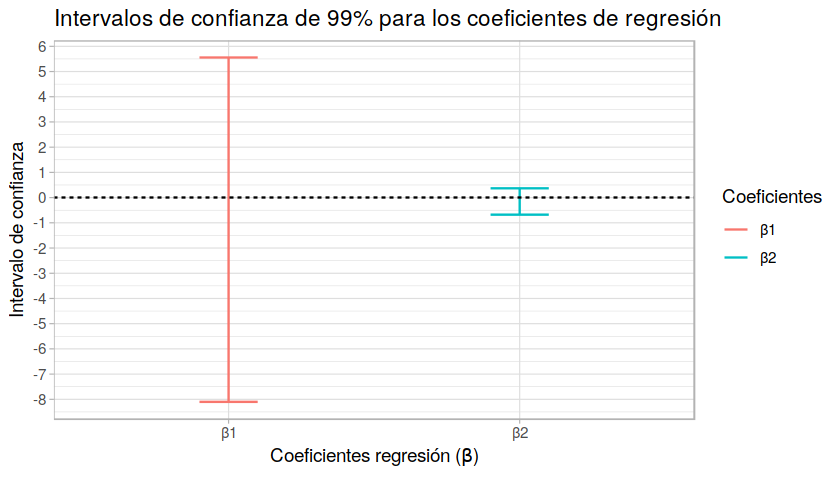

In [212]:
# Gráfico de los intervalos de confianza
options(repr.plot.width=7, repr.plot.height=4)
ggplot(conf_int, aes(coef, avg, colour=coef)) + 
    ggtitle("Intervalos de confianza de 99% para los coeficientes de regresión") +
    geom_errorbar(aes(ymin=lwr, ymax=upr), width = 0.2) +
    labs(x=TeX('Coeficientes regresión ($\\beta$ )'), y='Intervalo de confianza', color='Coeficientes') +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    scale_y_continuous(breaks=round(seq(min(conf_int) - 1, max(conf_int) + 1), 0)) +
    theme_light()

<div style="text-align: justify">Ambos intervalos incluyen al cero, y por lo tanto no es posible rechazar las hipótesis $H_{0_1}: \beta_1 = 0$ y $H_{0_2}: \beta_2 = 0$.</div>

<br></br>

#### <div style="text-align: justify">i ) Vuelva a calcular los intervalos de confianza del inciso h) después de añadir al modelo el término de interacción $x_1 x_2$ . Compare la longitud de estos intervalos con las de los calculados en el inciso h). ¿La longitud de estos intervalos proporciona alguna información sobre la contribución al modelo del término de interacción?</div>

In [19]:
inter_model <- lm(y ~ x1*x2, data=df)
display_markdown('Intervalos de confianza del $99\\%$ para $\\beta_1$, $\\beta_2$ y $\\beta_{1:2}$:')
conf_int <- as.data.frame(confint(inter_model, c('x1', 'x2', 'x1:x2'), level = 0.99))
conf_int <- cbind(c('β1', 'β2', 'β1:2'), conf_int)
colnames(conf_int)[1] <- ' '
rownames(conf_int) <- c()
as.htmlwidget(formattable(conf_int, align='c', list(' ' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left')))), width="50%")


Intervalos de confianza del $99\%$ para $\beta_1$, $\beta_2$ y $\beta_{1:2}$:

HTML widgets cannot be represented in plain text (need html)

In [214]:
colnames(conf_int) <- c('lwr', 'upr')
conf_int$avg <- apply(conf_int, 1, mean)
coef <- rownames(conf_int)

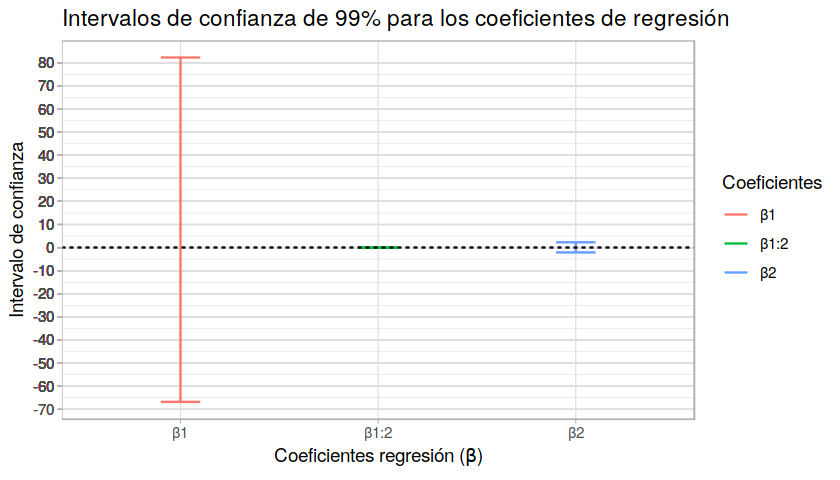

In [215]:
# Gráfico de los intervalos de confianza
options(repr.plot.width=7, repr.plot.height=4)
ggplot(conf_int, aes(coef, avg, colour=coef)) + 
    ggtitle("Intervalos de confianza de 99% para los coeficientes de regresión") +
    geom_errorbar(aes(ymin=lwr, ymax=upr), width = 0.2) +
    labs(x=TeX('Coeficientes regresión ($\\beta$ )'), y='Intervalo de confianza', color='Coeficientes') +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    scale_y_continuous(breaks=round(seq(min(conf_int) - 1, max(conf_int) + 1), -1)) +
    theme_light()

<div style="text-align: justify">Obervando la longitud de los intervalos de confianza, se puede asegurar con un alto grado de seguridad que el término de interacción no contribuye al modelo.</div>

<br></br>

#### <div style="text-align: justify">j ) Para el modelo que utiliza las variables de regresión $x_1$  y $x_2$ calcule $R^2$.</div>

In [216]:
r_squared <- summary(full_model)$r.squared
display_markdown(paste('$R^2 =$', round(r_squared, 4)))

$R^2 =$ 0.8618

<br></br>

#### <div style="text-align: justify">k) ¿Qué sucede con el valor de $R^2$ cuando se añade al modelo un término de interacción $x_1 x_2$?</div>

In [217]:
r_squared <- summary(inter_model)$r.squared
display_markdown(paste('$R^2 =$', round(r_squared, 4)))

$R^2 =$ 0.9205

<div style="text-align: justify">La adición del término de interacción $x_1 x_2$ logró un incremento del coeficiente de determinación.</div>

***
<br></br>

### **Ejercicio 4**

#### <div style="text-align: justify">Se ajusta el modelo de regresión $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon$ a una muestra de $n = 25$ observaciones. Los cocientes t calculados</div>

#### <div style="text-align: center">$$t_0 = \frac{\hat{\beta}_j}{\sqrt{V\left(\hat{\beta}_j\right)}}$$</div>

#### <div style="text-align: justify">son los siguientes:</div>

<table style="width: 80%; border: 1px solid white;
  border-collapse: collapse;">
<thead>
  <tr style="font-size: larger">
    <th style="border: 1px solid white; border-collapse: collapse; background-color: #C8C8C8;"></th>
    <th style="border: 1px solid white; border-collapse: collapse; background-color: #C8C8C8;">$\beta_1$</th>
    <th style="border: 1px solid white; border-collapse: collapse; background-color: #C8C8C8;">$\beta_2$</th>
    <th style="border: 1px solid white; border-collapse: collapse; background-color: #C8C8C8;">$\beta_3$</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: center; vertical-align: middle; font-size: larger; border: 1px solid white; border-collapse: collapse; background-color: #C8C8C8;">$t_0$</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">4.82</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">8.21</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">0.98</td>
  </tr>
</tbody>
</table>

<br></br>

#### <div style="text-align: justify">a) Encuentre el p-valor para cada uno de los estadísticos t.</div>

In [157]:
n <- 25 # cantidad de observaciones
t_values <- c(4.82, 8.21, 0.98) # cocientes calculados
p <- length(t_values) + 1 # número de coeficientes = 4
df <- n - p # grados de libertad = número de coeficientes = 4
p_values <- pt(q=t_values, df=df, lower.tail=FALSE)


In [158]:
display_html(sprintf('
<table style="width: 40%%;">
    <thead style="text-align: center">
        <th style="text-align: center; font-weight: normal">Coeficiente</th>
        <th style="text-align: center">$t_0$</th>
        <th style="text-align: center">$\\text{p-valor}$</th>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center">$\\beta_1$</td>
            <td style="text-align: center">%.4f</td>
            <td style="text-align: center">%.e</td>
        </tr>
        <tr>
            <td style="text-align: center">$\\beta_2$</td>
            <td style="text-align: center">%.2f</td>
            <td style="text-align: center">%.4f</td>
        </tr>
        <tr>
            <td style="text-align: center">$\\beta_3$</td>
            <td style="text-align: center">%.2f</td>
            <td style="text-align: center">%.4f</td>
        </tr>
    </tbody>
</table>
', t_values[1], p_values[1], t_values[2], p_values[2], t_values[3], p_values[3]))


Coeficiente 
 $t_0$ 
 $\text{p-valor}$ 
 
 
 
 $\beta_1$ 
 4.8200 
 5e-05 
 
 
 $\beta_2$ 
 8.21 
 0.0000 
 
 
 $\beta_3$ 
 0.98 
 0.1691

<br></br>

#### <div style="text-align: justify">b) Si se emplea $\alpha = 0.05$, ¿qué conclusiones pueden obtenerse sobre la variable de regresión $x_3$?. ¿Es posible que esta variable de regresión tenga una contribución significativa en el modelo?</div>

<div style="text-align: justify">El test $H_0: \beta_3 = 0$ arrojó un $\text{p-valor} = 0.1913 > 0.05$, lo cual indica que la variable regresora $x_3$ no tiene un aporte significativo en el modelo propuesto. En general, este resultado sugiere que la variable $x_3$ debe ser removida del modelo. 
También existe la posibilidad de que la relación entre $x_3$ y la variable respuesta no sea lineal. En este caso, se podría aplicar transformaciones a $x_3$ para linealizar la relación.</div>

***
<br></br>

### **Ejercicio 5**

#### <div style="text-align: justify">Los datos que aparecen a continuación se recopilaron durante un experimento para determinar el cambio en la eficiencia del impulso ($y$, en por ciento), a medida que cambia el ángulo de divergencia de la nariz de un cohete $\left(x\right)$.</div>

<table style="font-size: larger; border: 1px solid white;
  border-collapse: collapse;">
<tbody>
  <tr>
    <td style="text-align: center; vertical-align: middle; font-size: larger; border: 1px solid white; border-collapse: collapse; background-color: #C8C8C8;">$y$</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">24.60</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">24.71</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">23.90</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">39.50</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">39.60</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">57.12</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">67.11</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">67.24</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">67.15</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">77.87</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">80.11</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">84.67</td>
  </tr>
    <tr>
    <td style="text-align: center; vertical-align: middle; font-size: larger; border: 1px solid white; border-collapse: collapse; background-color: #C8C8C8;">$x$</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">4.00</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">4.00</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">4.00</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">5.00</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">5.00</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">6.00</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">6.50</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">6.50</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">6.75</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">7.00</td>
    <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">7.10</td>
      <td style="text-align: center; vertical-align: middle; border: 1px solid white; border-collapse: collapse; background-color: #F5F5F5;">7.30</td>
  </tr>
</tbody>
</table>

In [121]:
x <- c(4.00, 4.00, 4.00, 5.00, 5.00, 6.00, 6.50, 6.50, 6.75, 7.00, 7.10, 7.30)
y <- c(24.60, 24.71, 23.90, 39.50, 39.60, 57.12, 67.11, 67.24, 67.15, 77.87, 80.11, 84.67)
data <- as.data.frame(cbind(x, y))


In [122]:
display_markdown("#### **Resumen de los datos**")
df_summary <- as.data.frame(apply(data, 2, summary))
df_summary$values <- rownames(df_summary)
df_summary <- df_summary[,c(3,1,2)]
colnames(df_summary)[1] <- " "
rownames(df_summary) <- c()
table <- formattable(df_summary, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL)


#### **Resumen de los datos**

HTML widgets cannot be represented in plain text (need html)

<br></br>

#### <div style="text-align: justify">a) Ajuste a los datos un modelo de segundo orden.</div>

#### <div style="text-align: justify"><b>Modelo de segundo orden:</b> $y = \beta_0 + \beta_{1} x_1 + \beta_{11} x_1^2$</div>

In [190]:
model <- lm(y ~ x + I(x^2), data=data)


In [191]:
coef <- as.data.frame(x=model$coefficients)
colnames(coef) <- c('')
rownames(coef) <- c('β0', 'β1', 'β11')
coef <- as.data.frame(t(coef))
table <- formattable(coef, align = 'c')
as.htmlwidget(table, width="50%", height=NULL)


HTML widgets cannot be represented in plain text (need html)

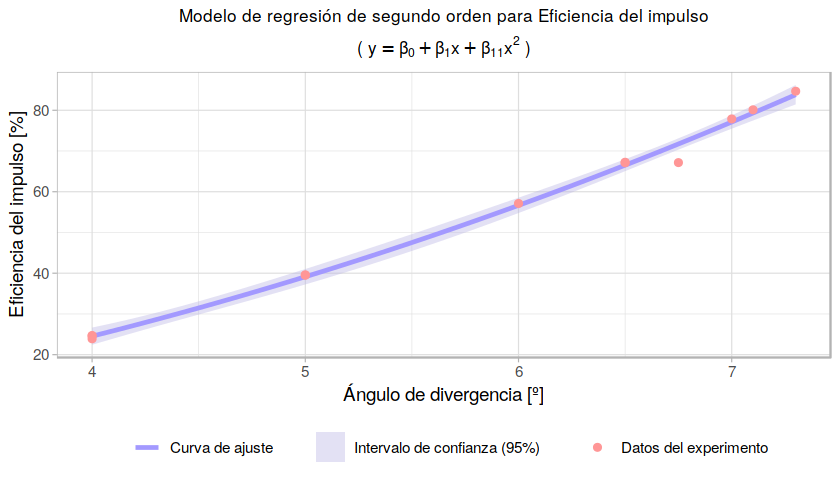

In [156]:
# Gráfico del modelo
options(repr.plot.width=7, repr.plot.height=4)
ggplot(data, aes(x=x, y=y)) + 
    labs(
        title="Modelo de regresión de segundo orden para Eficiencia del impulso",
        subtitle=TeX("( $y = β_0 + β_1 x + β_{11} x^2$ )"), 
        x="Ángulo de divergencia [º]", 
        y="Eficiencia del impulso [%]") +
    stat_smooth(aes(x=x, y=y, col="Curva de ajuste", fill="Intervalo de confianza (95%)"), 
                method="lm", formula=y ~ x + I(x^2), se=TRUE, size=1) +
    geom_point(aes(shape='Datos del experimento'), col='#ff9696') +
    theme_light() +
    theme(
        plot.title = element_text(size=10, hjust = 0.5), 
        plot.subtitle = element_text(size=10, hjust = 0.5),
        legend.position = "bottom") +
    scale_fill_manual(NULL, values = '#BAB5E3') +
    scale_color_manual(NULL, values = '#a399ff') +
    scale_shape_manual(NULL, values = 19) +
    guides(
        color=guide_legend(override.aes = list(fill=NA), order=1),
        fill=guide_legend(override.aes = list(color=NA), order=2),
        shape=guide_legend(order=3)) 


<div style="text-align: justify">Se observa un valor atípico entre los datos del experimento que no puede ser explicado por el modelo propuesto.</div>

<br></br>

#### <div style="text-align: justify">b) Pruebe la significancia de la regresión y la adecuación del ajuste, utilizando $\alpha = 0.05$.</div>

In [128]:
f_stat<- as.data.frame(t(summary(model)$fstatistic))
f_stat$p_value <- c(pf(f_stat[,1], f_stat[,2], f_stat[,3], lower.tail=FALSE))
f_stat <- as.data.frame(cbind('F-statistic', f_stat))
colnames(f_stat) <- c(' ', 'value', 'df1', 'df2', 'p-value')
table <- formattable(f_stat, align='c', list(` ` = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left'))))
as.htmlwidget(table, width="50%", height=NULL, )


HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor de la prueba de significancia de la regresión es $2.213e-11 < 0.05$, por lo que se rechaza la hipótesis nula $H_0: \beta_1 = \beta_{1:1} = 0$. </div>

<div style="text-align: justify">Para medir la bondad del ajuste se utiliza el coeficiente de determinación:</div>

<div style="text-align: center">$$R^2 = 1 - \frac{SSE}{SST}$$</div>

In [134]:
r_squared <- summary(model)$r.squared
display_markdown(sprintf('$R^2 = %.4f$', r_squared))


$R^2 = 0.9957$

<div style="text-align: justify">Este coeficiente indica qué proporción de la dispersión de la variable de salida es explicada por el modelo. Para el modelo propuesto $R^2 = 0.9957,$ muy cercano al valor máximo 1, lo que significa que el nivel de ajuste es bueno.</div>

<br></br>

#### <div style="text-align: justify">c) Pruebe la hipótesis $\beta_{11} = 0$ con $\alpha = 0.05$.</div>

<div style="text-align: justify">Para probar la hipótesis $H_0: \beta_{11} = 0$ se contrasta el modelo completo $\left(MC\right)$ con un modelo reducido que no contiene el término cuadrático$\left(MR\right)$$\left(MR\right)$. Se utiliza un estadístico F:</div>

#### <div style="text-align: center">$$F_0 = \frac{\left(SSE_{MR} - SSE_{MC}\right) / \left(k - r\right)}{SSE_{MC} / \left(n - p\right)}$$</div>

#### <div style="text-align: justify"><b>Modelo completo:</b> $y = \beta_0 + \beta_1 x + \beta_{11} x^2$</div>

In [193]:
sse_full <- sum((predict(model) - data$y)^2)
display_markdown(paste('$SSE_{MC} =$', round(sse_full, 4)))


$SSE_{MC} =$ 24.7202

#### <div style="text-align: justify"><b>Modelo reducido:</b> $y = \beta_0 + \beta_1 x$</div>

In [194]:
reduced_model <- lm(y ~ x, data=data)
sse_reduced <- sum((predict(reduced_model) - data$y)^2)
display_markdown(paste('$SSE_{MR} =$', round(sse_reduced, 4)))

$SSE_{MR} =$ 48.9825

In [195]:
# Cálculo de F0
k <- 2; r <- 1; n <- nrow(data); p <- length(coef)
f0 <- ((sse_reduced - sse_full) / (k - r)) / (sse_full / (n - p))
display_markdown(paste('$F_0 =$', round(f0, 4)))

$F_0 =$ 8.8333

In [196]:
# Cálculo del p-valor
alpha <- 0.05
p_value <- 1 - pf(f0, df1=k-r, df2=n-p) 
display_markdown(paste('$\\text{p-valor} =$', round(p_value, 4)))

$\text{p-valor} =$ 0.0156

<div style="text-align: justify">El p-valor de la prueba es $0.0156 < 0.05$. Por lo tanto se rechaza la hipótesis nula y se concluye que la adición del término cuadrático $x^2$ tiene un aporte significativo al modelo.</div>

<br></br>

#### <div style="text-align: justify">d) Haga una gráfica de los residuos y comente la adecuación del modelo.</div>

In [177]:
# LOWESS line (la misma linea que ajusta los valores usando plot(model)): 
smoothed <- data.frame(with(data, lowess(x = model$fitted, y = model$residuals)))


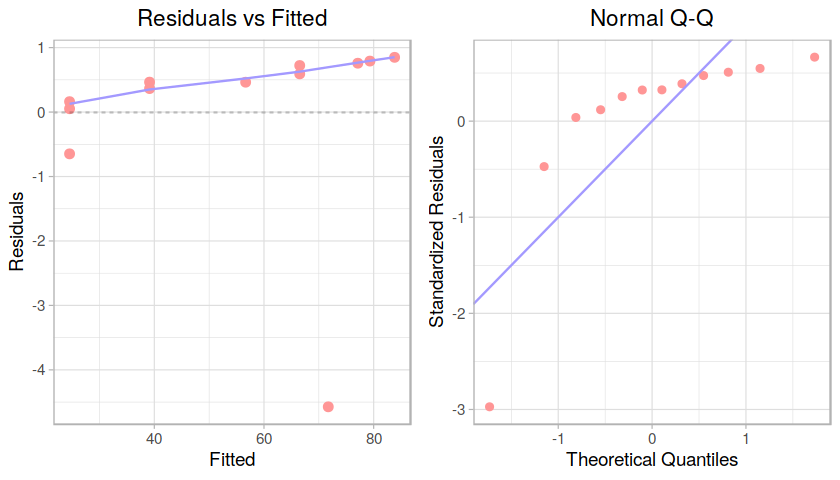

In [176]:
# Gráficos
options(repr.plot.width=7, repr.plot.height=4)
res_vs_fit <- ggplot(model) + 
    geom_point(aes(x=model$fitted, y=model$residuals), color= '#ff9696', size=2) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff") +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(plot.title = element_text(hjust = 0.5))

qq_plot <- ggplot(model) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696') +
    geom_abline(col="#a399ff") +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(plot.title = element_text(hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">En la gráfica de residuos vs valores ajustados se observa que la mayoría de los residuos tienen valores positivos, lo cual sugiere que la media de los residuos no es 0. Además, existe un valor significativamente atípico. Por otra parte, el gráfico Q-Q muestra claramente que los residuos no provienen de una distribución normal. Estos aspectos indican un incumplimiento de los supuestos necesarios para la validez del modelo.</div>

<br></br>

#### <div style="text-align: justify">e) Ajuste un modelo cúbico y pruebe la significancia del término cúbico, utilizando $\alpha = 0.05$</div>

#### <div style="text-align: justify"><b>Modelo de tercer orden:</b> $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$</div>

In [202]:
cubic_model <- lm(y ~ x + I(x^2) + I(x^3), data=data)


In [203]:
coef <- as.data.frame(x=cubic_model$coefficients)
colnames(coef) <- c('')
rownames(coef) <- c('β0', 'β1', 'β2', 'β3')
coef <- as.data.frame(t(coef))
table <- formattable(coef, align = 'c')
as.htmlwidget(table, width="50%", height=NULL)


HTML widgets cannot be represented in plain text (need html)

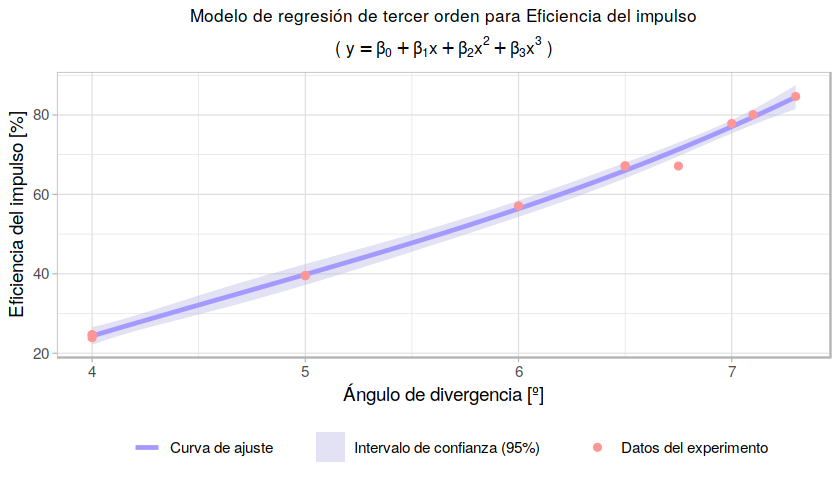

In [209]:
# Gráfico del modelo
options(repr.plot.width=7, repr.plot.height=4)
ggplot(data, aes(x=x, y=y)) + 
    labs(
        title="Modelo de regresión de tercer orden para Eficiencia del impulso",
        subtitle=TeX("( $y = β_0 + β_1 x + β_2 x^2 + β_3 x^3$ )"), 
        x="Ángulo de divergencia [º]", 
        y="Eficiencia del impulso [%]") +
    stat_smooth(aes(x=x, y=y, col="Curva de ajuste", fill="Intervalo de confianza (95%)"), 
                method="lm", formula=y ~ x + I(x^2) + I(x^3), se=TRUE, size=1) +
    geom_point(aes(shape='Datos del experimento'), col='#ff9696') +
    theme_light() +
    theme(
        plot.title = element_text(size=10, hjust = 0.5), 
        plot.subtitle = element_text(size=10, hjust = 0.5),
        legend.position = "bottom") +
    scale_fill_manual(NULL, values = '#BAB5E3') +
    scale_color_manual(NULL, values = '#a399ff') +
    scale_shape_manual(NULL, values = 19) +
    guides(
        color=guide_legend(override.aes = list(fill=NA), order=1),
        fill=guide_legend(override.aes = list(color=NA), order=2),
        shape=guide_legend(order=3)) 


<div style="text-align: justify">De forma similar al caso anterior, se prueba la hipótesis $H_0: \beta_3 = 0$ comparando el modelo completo con un modelo reducido, y utilizando un estadístico $F$.</div>

#### <div style="text-align: justify"><b>Modelo completo:</b> $y = \beta_0 + \beta x_1 + \beta_2 x^2 + \beta_3 x^3$</div>

In [205]:
sse_full <- sum((predict(cubic_model) - data$y)^2)
display_markdown(paste('$SSE_{MC} =$', round(sse_full, 4)))

$SSE_{MC} =$ 22.4152

#### <div style="text-align: justify"><b>Modelo reducido:</b> $y = \beta_0 + \beta_1 x +  \beta_2 x^2$</div>

In [206]:
reduced_model <- lm(y ~ x + I(x^2), data=data)
sse_reduced <- sum((predict(reduced_model) - data$y)^2)
display_markdown(paste('$SSE_{MR} =$', round(sse_reduced, 4)))

$SSE_{MR} =$ 24.7202

In [207]:
# Cálculo de F0
k <- 3; r <- 2; n <- nrow(data); p <- length(coef)
f0 <- ((sse_reduced - sse_full) / (k - r)) / (sse_full / (n - p))
display_markdown(paste('$F_0 =$', round(f0, 4)))

$F_0 =$ 0.8226

In [208]:
# Cálculo del p-valor
alpha <- 0.05
p_value <- 1 - pf(f0, df1=k-r, df2=n-p) 
display_markdown(paste('$\\text{p-valor} =$', round(p_value, 4)))

$\text{p-valor} =$ 0.3909

<div style="text-align: justify">El p-valor de la prueba es $0.3909 > 0.05$. Por lo tanto no es posible rechazar la hipótesis nula y se concluye que la adición del término cúbico $x^3$ no contribuye al modelo de forma significativa.</div>

<br></br>
***
<br></br>